In [1]:
import pandas as pd


fname = "consumption_history.csv"
df = pd\
    .read_csv(fname, parse_dates=[])

# drop unneccessary column
df.drop(columns=df.columns[0],inplace=True)

# convert date string to datetime type
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],format="%d/%m/%Y %H:%M")
df[df.columns[1]] = pd.to_datetime(df[df.columns[1]],format="%d/%m/%Y %H:%M")

#
display(df.columns, df.dtypes, df.iloc[417])


# extract a column
# c1 = df[df.columns[2]]

# extract a row
# r1 = df.iloc[1484]
# display(c1,r1)


Index(['Start date/time', 'End date/time', 'Total Consumption (Unit)'], dtype='object')

Start date/time             datetime64[ns]
End date/time               datetime64[ns]
Total Consumption (Unit)           float64
dtype: object

Start date/time             2021-04-10 09:00:00
End date/time               2021-04-10 10:00:00
Total Consumption (Unit)                    0.0
Name: 417, dtype: object

In [2]:
stats = {}
sigma = {}

stats['mean'] = df[df.columns[2]].mean()
stats['median'] = df[df.columns[2]].median()
stats['std'] = df[df.columns[2]].std()

sigma["+2"] = stats['mean']+2*stats['std']
sigma["+1"] = stats['mean']+stats['std']
sigma["-1"] = stats['mean']-stats['std']

display(stats, sigma)

df_1sigma = df[df[df.columns[2]] > sigma['+1']]
df_1sigma = df_1sigma.sort_values(df.columns[2], ascending=False)

df_2sigma = df[df[df.columns[2]] > sigma['+2']]
df_2sigma = df_2sigma.sort_values(df.columns[2], ascending=False)
display(df_2sigma)





{'mean': 0.3981558321807285, 'median': 0.3, 'std': 0.31927083620187097}

{'+2': 1.0366975045844704, '+1': 0.7174266683825994, '-1': 0.07888499597885751}

,Start date/time,End date/time,Total Consumption (Unit)
1484,2021-05-24 20:00:00,2021-05-24 21:00:00,2.0
2152,2021-06-21 16:00:00,2021-06-21 17:00:00,1.9
2153,2021-06-21 17:00:00,2021-06-21 18:00:00,1.8
2155,2021-06-21 19:00:00,2021-06-21 20:00:00,1.8
1411,2021-05-21 19:00:00,2021-05-21 20:00:00,1.8
...,...,...,...
1585,2021-05-29 01:00:00,2021-05-29 02:00:00,1.1
1586,2021-05-29 02:00:00,2021-05-29 03:00:00,1.1
1609,2021-05-30 01:00:00,2021-05-30 02:00:00,1.1
1612,2021-05-30 04:00:00,2021-05-30 05:00:00,1.1


,Start date/time,End date/time,Total Consumption (Unit),zscore
445,2021-04-11 13:00:00,2021-04-11 14:00:00,0.0,-1.247079
82,2021-03-27 10:00:00,2021-03-27 11:00:00,0.0,-1.247079
2098,2021-06-19 10:00:00,2021-06-19 11:00:00,0.0,-1.247079
417,2021-04-10 09:00:00,2021-04-10 10:00:00,0.0,-1.247079
4,2021-03-24 04:00:00,2021-03-24 05:00:00,0.0,-1.247079
...,...,...,...,...
2155,2021-06-21 19:00:00,2021-06-21 20:00:00,1.8,4.390768
2153,2021-06-21 17:00:00,2021-06-21 18:00:00,1.8,4.390768
1411,2021-05-21 19:00:00,2021-05-21 20:00:00,1.8,4.390768
2152,2021-06-21 16:00:00,2021-06-21 17:00:00,1.9,4.703982


<AxesSubplot:title={'center':'Hourly Energy Usage distribution'}, xlabel='Start date/time'>

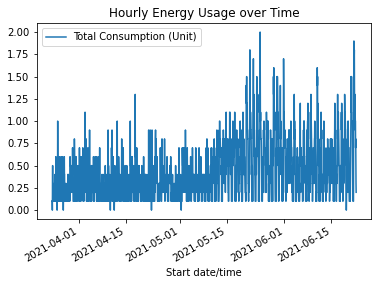

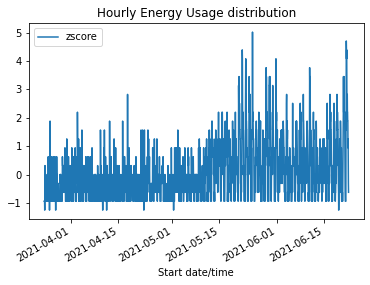

In [3]:
import matplotlib.pyplot as plt

col = df[df.columns[2]]
df_zscore = (col - col.mean())/col.std()

df1=df
df1['zscore']=df_zscore

df1=df.sort_values("zscore")

display(df1)

df1.plot(x=df.columns[0], y=df.columns[2], title="Hourly Energy Usage over Time")
df1.plot(x=df.columns[0], y="zscore", title="Hourly Energy Usage distribution")

Index(['Total Consumption (Unit)'], dtype='object')

,Total Consumption (Unit)
Start date/time,
2021-03-24,4.3
2021-03-25,5.3
2021-03-26,5.3
2021-03-27,4.5
2021-03-28,4.7
...,...
2021-06-18,14.1
2021-06-19,14.0
2021-06-20,14.1


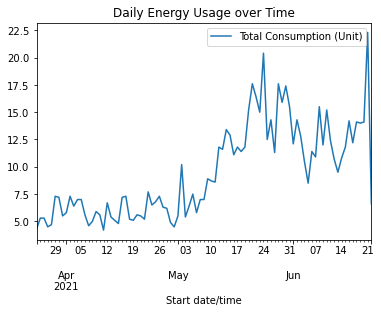

In [4]:
# group by day
dateCol = df.columns[0]
valueCol = df.columns[2]

df_day = df.groupby(pd.Grouper(key=dateCol, freq='D')).sum()

try:
    df_day.drop(columns="zscore",inplace=True)
except:
    pass

display(df_day.columns, df_day, )



df_day.plot( y=df_day.columns[0], title="Daily Energy Usage over Time")

df_day.to_csv("day_history.csv")

,Total Consumption (Unit)
Start date/time,
2021-03-24,4.3
2021-03-25,5.3
2021-03-26,5.3
2021-03-27,4.5
2021-03-28,4.7
...,...
2021-06-18,14.1
2021-06-19,14.0
2021-06-20,14.1


,Year,Month,Day,Value,Date
0,2021.0,1.0,1.0,16.1,2021-01-01
1,2021.0,1.0,2.0,19.5,2021-01-02
2,2021.0,1.0,3.0,22.3,2021-01-03
3,2021.0,1.0,4.0,22.0,2021-01-04
4,2021.0,1.0,5.0,23.0,2021-01-05
...,...,...,...,...,...
18,NaN,NaN,NaN,32.4,2021-06-19
19,NaN,NaN,NaN,32.6,2021-06-20
20,NaN,NaN,NaN,32.1,2021-06-21
21,NaN,NaN,NaN,29.6,2021-06-22


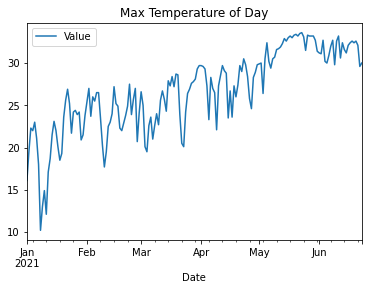

In [5]:
# weather
df_weather = pd.read_csv("weather_ty_max.csv", engine='python',skiprows=2, skipfooter=3)

df_weather.drop(columns=df_weather.columns[-1], inplace=True)

date= pd.to_datetime(df_weather[['Day','Month','Year']])

df_weather['Date']=date;
display(df_day)
df_day.info



# combined weather
df_weather6 = pd.read_csv('./june_max_weather.csv', parse_dates=["Date"])
df_weather6 = df_weather6.rename(columns={"Temp":"Value"})
df_weather6.dtypes

df_weather = df_weather.append(df_weather6)
display(df_weather)

plt1=df_weather.plot(x="Date", y="Value", title="Max Temperature of Day")



Start date/time             datetime64[ns]
Total Consumption (Unit)           float64
dtype: object

'Start date/time'

Year            float64
Month           float64
Day             float64
Value           float64
Date     datetime64[ns]
dtype: object

'Date'

,Total Consumption (Unit),Date,Value
0,4.3,2021-03-24,24.2
1,5.3,2021-03-25,26.4
2,5.3,2021-03-26,26.9
3,4.5,2021-03-27,27.6
4,4.7,2021-03-28,27.8
...,...,...,...
86,14.1,2021-06-18,32.6
87,14.0,2021-06-19,32.4
88,14.1,2021-06-20,32.6
89,22.3,2021-06-21,32.1


Text(0.5, 0, 'Temperature (Celsius)')

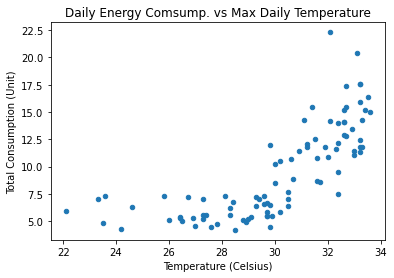

In [12]:
# compare df_day with df_weather
df_unstack = df_day.reset_index()

display(
    df_unstack.dtypes,
    df_unstack.columns[0],
    df_weather.dtypes,
    df_weather.columns[-1]
)

df_merge = df_day.merge(df_weather[['Date', 'Value']], how='inner',
                        left_on=df_unstack.columns[0], right_on=df_weather.columns[-1])

display(df_merge)

ax=df_merge.plot.scatter(y=df_merge.columns[0], x="Value", title="Daily Energy Comsump. vs Max Daily Temperature")
ax.set_xlabel("Temperature (Celsius)")


,Total Consumption (Unit),Value
0,4.3,24.2
1,5.3,26.4
2,5.3,26.9
3,4.5,27.6
4,4.7,27.8
...,...,...
86,14.1,32.6
87,14.0,32.4
88,14.1,32.6
89,22.3,32.1


array([[10.95185185, 31.8       ],
       [ 5.9       , 27.82888889],
       [15.91578947, 32.72105263]])

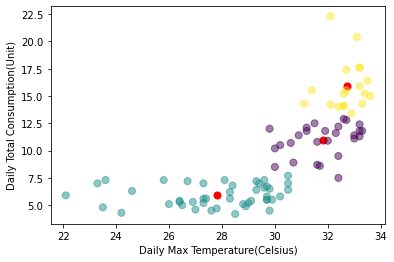

In [42]:
# Kmean
# cluster df_merge [0]=comsump, [1]=date, [2]=temp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_merge[[df_merge.columns[0], df_merge.columns[-1]]]
display(X)
kmeans = KMeans(n_clusters=3).fit(X)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,1], centroids[:,0], c='red',s=50)

powCol,tempCol = X.columns
plt.scatter(x=X[tempCol], y=X[powCol],c=kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.ylabel("Daily Total Consumption(Unit)") 
plt.xlabel("Daily Max Temperature(Celsius)")

centroids



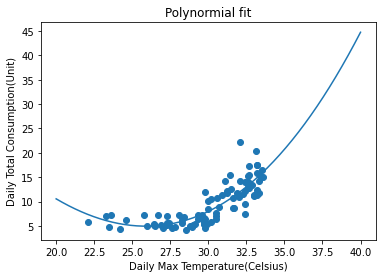

In [100]:
import numpy as np
import scipy.stats as stats

#add legend
X1 = df_merge[tempCol].values
Y1 = df_merge[powCol].values

import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(X1, Y1)

#polynomial fit with degree
degree=3
model = np.poly1d(np.polyfit(X1, Y1, degree))

#add fitted polynomial line to scatterplot
polyline = np.linspace(20, 40, 50)
plt.plot(polyline, model(polyline))
plt.title("Polynormial fit")
plt.ylabel("Daily Total Consumption(Unit)") 
plt.xlabel("Daily Max Temperature(Celsius)")
plt.show()

In [103]:
model

poly1d([ 1.95260788e-03,  2.07312588e-02, -5.00330966e+00,  8.67232288e+01])